# Recommendation Systems

Are among the most popular applications of data science. They are used to predict rating or preference use will give to an item. Almost every major company has applied them in some form or other: Amazon uses it tosuggest products to customer. Youtube uses it todecide which video to play next in autoplay, facebook uses it to recommend pages to like an people to follow.


## Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
books = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Book Recommendation System\\BX_Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [3]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM','imageUrlL']

In [4]:
users = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Book Recommendation System\\BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [5]:
users.columns = ['userID', 'Location', 'Age']

In [6]:
    rating = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Book Recommendation System\\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [7]:
rating.columns = ['userID', 'ISBN', 'bookRating']

In [8]:
rating.shape

(1149780, 3)

In [9]:
rating.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

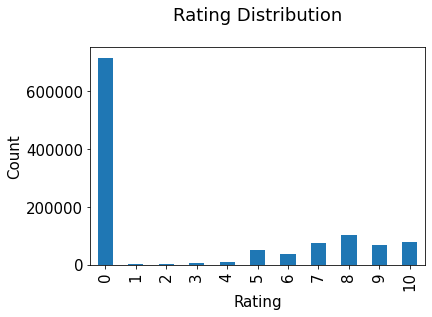

In [10]:
plt.rc("font", size=15)
rating.bookRating.value_counts(sort=False).plot(kind="bar")
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
print(books.shape)
print(books.columns)

(271379, 8)
Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')


In [12]:
print(users.shape)
print(users.columns)

(278858, 3)
Index(['userID', 'Location', 'Age'], dtype='object')


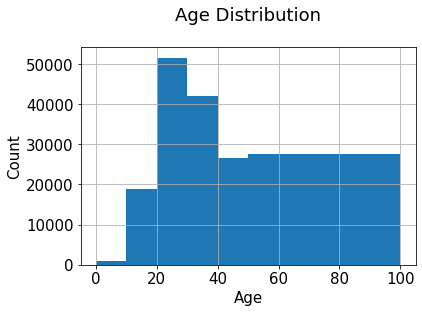

In [13]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
rating

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


To ensure statistical significance, users with less than 200 ratings, and books with 100 ratings are excluded.

In [15]:
counts1 = rating['userID'].value_counts()
rating = rating[rating['userID'].isin(counts1[counts1>=200].index)]
counts = rating['bookRating'].value_counts()
rating = rating[rating['bookRating'].isin(counts[counts>=100].index)]

In [16]:
rating.shape

(527556, 3)

# Collabrative filtering using KNN

KNN is a machine learning algorithm to find clusters of similar users based on common book rating, and making predictions using the average rating of top k-nearest neighbours.

For example, we first present ratings in a matrix having one row for each item (book) and one column for each user.

In [17]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [18]:
combine_book_rating = pd.merge(rating, books, on='ISBN')

In [19]:
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [20]:
combine_book_rating = combine_book_rating.drop(columns, axis=1)

In [21]:
combine_book_rating

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...
488751,275970,1892145022,0,Here Is New York
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
488753,275970,3411086211,10,Die Biene.
488754,275970,3829021860,0,The Penis Book


## Now we will group by book titles and create a new column for total rating count.

In [22]:
combine_book_rating.isnull().sum()

userID        0
ISBN          0
bookRating    0
bookTitle     0
dtype: int64

In [23]:
combine_book_rating.shape

(488756, 4)

No nulls so nan handling not needed

In [24]:
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

In [25]:
combine_book_rating.shape

(488756, 4)

In [26]:
book_ratingCount = (combine_book_rating.groupby(by=['bookTitle'])['bookRating'].count().reset_index().rename(columns={'bookRating':'totalRatingCount'})[['bookTitle', 'totalRatingCount']])

In [27]:
book_ratingCount

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160582,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160583,Ã?Â?lpiraten.,1
160584,Ã?Â?rger mit Produkt X. Roman.,1
160585,Ã?Â?stlich der Berge.,1


### Now we will combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser known books.

In [28]:
combine_book_rating

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...
488751,275970,1892145022,0,Here Is New York
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
488753,275970,3411086211,10,Die Biene.
488754,275970,3829021860,0,The Penis Book


In [29]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on='bookTitle', right_on='bookTitle', how='left')

In [30]:
rating_with_totalRatingCount

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
...,...,...,...,...,...
488751,275970,1892145022,0,Here Is New York,1
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,1
488753,275970,3411086211,10,Die Biene.,1
488754,275970,3829021860,0,The Penis Book,1


In [31]:
pd.set_option('display.float_format', lambda x:'%.3f' % x)

In [32]:
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [33]:
book_ratingCount['totalRatingCount'].quantile(np.arange(.9,1,.01))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64

In [35]:
popularity_threshhold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshhold')
rating_popular_book

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
...,...,...,...,...,...
487030,269566,0670809381,0,Echoes,54
487558,271284,0440910927,0,The Rainmaker,180
487810,271705,B0001PIOX4,0,Fahrenheit 451,119
488416,274808,0449701913,0,Homecoming,61


# Filter to users in US and Canada only

In [36]:
combined = rating_popular_book.merge(users, left_on='userID', right_on='userID', how='left')

In [38]:
us_canada_user_rating = combined[combined['Location'].str.contains('usa|canada')]

In [39]:
us_canada_user_rating

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.000
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.000
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.000
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.000
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa",47.000
...,...,...,...,...,...,...,...
62144,269566,0670809381,0,Echoes,54,"seattle, washington, usa",9.000
62145,271284,0440910927,0,The Rainmaker,180,"alexandria, virginia, usa",50.000
62146,271705,B0001PIOX4,0,Fahrenheit 451,119,"atlanta, georgia, usa",25.000
62147,274808,0449701913,0,Homecoming,61,"paynesville, , usa",17.000


In [42]:
us_canada_user_rating.drop(['Age'], axis=1, inplace=True)

In [43]:
us_canada_user_rating

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...
62144,269566,0670809381,0,Echoes,54,"seattle, washington, usa"
62145,271284,0440910927,0,The Rainmaker,180,"alexandria, virginia, usa"
62146,271705,B0001PIOX4,0,Fahrenheit 451,119,"atlanta, georgia, usa"
62147,274808,0449701913,0,Homecoming,61,"paynesville, , usa"


# Implementing KNN

We convert our table to a 2D metrix, and fill missing values with 0 (since we will calculate distance between rating vectors).

We then transform values (rating) of matrix dataframe to a scipy sparse matrix for more efficient calculations.


In [44]:
from scipy.sparse import csr_matrix


In [45]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])

In [46]:
us_canada_user_rating

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...
62142,268932,0192815032,8,Pride and Prejudice,64,"red deer, alberta, canada"
62144,269566,0670809381,0,Echoes,54,"seattle, washington, usa"
62146,271705,B0001PIOX4,0,Fahrenheit 451,119,"atlanta, georgia, usa"
62147,274808,0449701913,0,Homecoming,61,"paynesville, , usa"


In [47]:
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index='bookTitle', columns='userID', values='bookRating').fillna(0)

In [48]:
us_canada_user_rating_pivot

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
84 Charing Cross Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.000,0.000,0.000,7.000,0.000,0.000,0.000,7.000,0.000,0.000,...,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
You Belong To Me,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [49]:
us_canada_user_rating_pivot.values

array([[ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [50]:
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [51]:
us_canada_user_rating_matrix

<746x734 sparse matrix of type '<class 'numpy.float64'>'
	with 13028 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')


In [54]:
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [55]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

In [56]:
query_index

744

In [57]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [58]:
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

In [59]:
distances

array([[0.        , 0.32127815, 0.4531585 , 0.50065611, 0.55246765,
        0.58632985]])

In [60]:
indices

array([[744, 204, 442, 299, 494, 184]], dtype=int64)

In [62]:
us_canada_user_rating_pivot.index[query_index]

'Zoya'

In [63]:
distances.flatten()

array([0.        , 0.32127815, 0.4531585 , 0.50065611, 0.55246765,
       0.58632985])

In [65]:
for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendation for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for Zoya:

1: Fine Things, with distance of 0.3212781451495822:
2: Secrets, with distance of 0.4531585017174248:
3: Kaleidoscope, with distance of 0.5006561067593318:
4: Tell Me Your Dreams, with distance of 0.5524676492240059:
5: Exclusive, with distance of 0.5863298480039847:


In [72]:
# us_canada_user_rating_pivot.index[744]